# Numpy

We are already familiar with Python lists, which are used for storing sequences of data. In this lesson we will discover a second data type for storing sequences of data: the **Numpy array**. `Numpy` is a Python package designed for working with numerical data. To use it, first import the `numpy` package and give it the alias `np`:

In [1]:
import numpy as np

The simplest way to create a `numpy` array is from a Python list. First create a list of `integers` or `floats`, then use the function `np.array` create an array:

In [2]:
data = [5, 7, 4, 5] # create a Python list
x = np.array(data) # create a numpy array called x containing the same values as 'data'

print(x)

[5 7 4 5]


In many ways `numpy` arrays are the same as Python lists. We can access individual items by index using square brackets `x[i]` and sub-arrays using the slice notation `x[a:b]`. Remember that we include the start index `a` but exclude the end index `b`.

In [3]:
y = x[1:3] # extract elements from index 1 to 3
print(y)

[7 4]


Note that `numpy` arrays can only contain numerical data. Do not try to store a `string` in an array.

## Vector Operations
Arrays support **vector operations**. These allow us to perform operations on every item in the array simultaneously, without having to use a loop. For example, to add `10` to every element in an array:

In [4]:
y = x + 10
print(y)

[15 17 14 15]


Or to calculate the square of every element of the array:

In [5]:
z = x ** 2
print(z)

[25 49 16 25]


Note this is only possible because `x` is a numpy array. The following will not work:

```
a = [1, 2, 3]
b = a + 1 # error since a is a list
```
We can also perform vector operations on two arrays. For example, to multiply two arrays element-wise:

In [6]:
x = np.array([2, 4, 6, 8])
y = np.array([1, 3, 5, 7])
z = x * y # multiply two arrays element-by-element
print("x * y:", z)

x * y: [ 2 12 30 56]


## Numpy Functions

`Numpy` also includes a number of useful mathematical functions such as `np.sin`, `np.cos` and `np.exp`. In the same way as arithmetic operators, they can be applied to arrays elementwise.

The mathematical constant $\pi = 3.14\ldots$ is available in numpy as `np.pi`.

In [7]:
theta = np.array([np.pi/4, np.pi/2]) # create an array with two elements
x = np.sin(theta) # calculate the sin of the array elements
print("theta:", theta)
print("sin(theta):", x)

theta: [0.78539816 1.57079633]
sin(theta): [0.70710678 1.        ]


## Creating Numpy Arrays

Unlike Python lists, once a `numpy` array is created, it cannot be resized. We learnt how to create an empty list `[]` and add elements one at a time, but this method doesn't work for arrays. Instead, we must decide the size of the array upfront and create an array of the intended size. Use `np.zeros(n)` to create an array of `n` zeros:

In [8]:
z = np.zeros(6) # Create an array of 6 zeros
print(z)

[0. 0. 0. 0. 0. 0.]


Use `np.arange(a, b, step)` to create an array of evenly spaced numbers ranging from `a` to `b` with step size `step`:

In [9]:
z = np.arange(0, 1, 0.1)
print(z)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


---
**PYTHON LISTS VS NUMPY ARRAYS**

|Python list|Numpy array|
|---|---|
|Fixed size (no `append` method)|Variable size (use `list.append` to add an item to a list)|
|One-dimensional|One-dimensional or multidimensional|
|Can store multiple data types (strings, floats, ints, other lists)|Can store only numerical data of a single type|
|Does not support vector operations|Supports vector operations|
|Slow|Fast|

---

## Example: Sinusoidal Motion
The following equation describes the motion of a damped linear oscillator, where $t$ is time and $x$ is displacement.

$$x(t) = e^{-\alpha t}\sin\left(\pi f t\right)$$

Plot the trajectory of the oscillator, given $\alpha=0.2$ and $f=1.5$.

Text(0, 0.5, 'Displacement (m)')

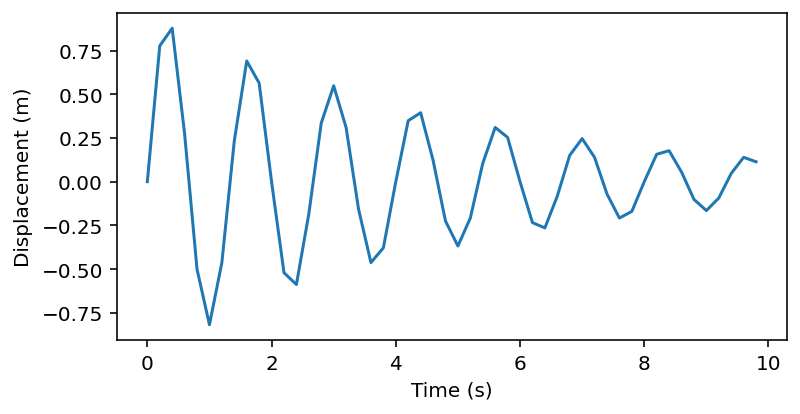

In [10]:
alpha = 0.2
f = 1.5
time = np.arange(0, 10, 0.2) # create an array of evenly spaced time points between 0 and 10
x = np.exp(-alpha * time) * np.sin(np.pi * f * time) # calculate the displacement x using vector operations 

import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.plot(time, x)
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")

---
**Exercise**  
The graph is quite jagged due to the large step size. Make the graph smoother by changing the step size in the `np.arange` function.

---


## Multi-Dimensional Arrays
We specifiy 2 dimensional arrays using a list whose elements are the rows of the array. For example, to specify the following 2-d array:
$$\left[\begin{matrix}
1 & 2 & 3\\
4 & 5 & 6
\end{matrix}\right]$$

In [11]:
data = [[1, 2, 3], [4, 5, 6]]
x = np.array(data)




print(x)

[[1 2 3]
 [4 5 6]]


`data` is a **nested list**. Each element of `data` is itself a list representing a row of the array. Note that we can make this a lot clearer by writing each row on a separate line:

In [12]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])
print(x)

[[1 2 3]
 [4 5 6]]


Individual array elements are accessed using the `[]` index notation, passing one index per dimension. `x[i,j]` returns the element in row `i`, column `j`:

In [13]:
z = x[0,1]
print(z)

2


### Array slicing
Use a colon `:` in place of the index to extract an entire row or column from an array. This is called taking a 'slice' from the array.

In [14]:
first_row = x[0,:]
print(first_row)

[1 2 3]


In [15]:
first_column = x[:,0]
print(first_column)

[1 4]


Supply starting and ending indexes to extract parts of an array.  Remember that in Python, we always include the start index but exclude the end index.

In [16]:
first_two_columns = x[:,:1]
print(first_two_columns)

[[1]
 [4]]


## Example: Linear Oscillator

Newton's law states that the acceleration of a mass is proportional the force applied to it:

$$F = m\ddot{x}$$

where $F$ is force, $m$ is mass and $\ddot{x}$ is the second derivative of particle displacement.

Suppose we have a mass attached to a spring. Then Hooke's law states that the force on the mass is proportional to displacement $x$, measured from its equilibrium position:

$$F = -kx$$

The minus sign represents the fact that the force acts in the opposite direction to the displacement.

Combining the two equations and setting velocity $v = \dot{x}$ we arrive at the following set of coupled equations:

$$ \begin{align*}
\frac{dx}{dt} &= v\\
\frac{dv}{dt} &= (-k/m)x
\end{align*}$$

To solve these equations numerically, we will split time into discrete timesteps $\Delta t$, and calculate the approximate change in $x$ and $v$ at each timestep:

$$ \begin{align*}
\frac{\Delta x}{\Delta t} &= v\\
\frac{\Delta v}{\Delta t} &= (-k/m)x
\end{align*}$$

Finally, using $x_i$ and $v_i$ to represent the value of displacement and velocity at timestep $i$:

$$ \begin{align*}
x_{i+1} &= x_i + v_i\Delta t\\
v_{i+1} &= v_i + (-k/m)x_i\Delta t
\end{align*}$$

Using this form of equations we can **numerically integrate** the system from a given **initial condition** $x_0, v_0$.

Given one-dimensional numpy arrays `x` and `v` representing the displacement and velocity respectively, we can use the equations above to calculate the values of `x[i+1]` and `v[i+1]` given `x[i]` and `v[i]`.

```
x[i+1] = x[i] + v[i] * delta_t
v[i+1] = v[i] - (k/m)*x[i]*delta_t
```

First we import the necessary libraries and set the values of the timestep `delta_t`, upper time limit `t_max`, spring constant `k` and mass `m`.

In [17]:
import matplotlib.pyplot as plt
import numpy as np

t_max = 40
delta_t = 0.001 # time step is 1 ms
k = 0.1
m = 0.1

Next, we create an array of timepoints `t` and arrays of the same length `x` and `v`. `x` and `v` are initially zero, except for the first elements which are set to the initial displacement and velocity.

In [18]:
t = np.arange(0, t_max, delta_t) # array of time points from 0 to t_max

n_steps = len(t)

x = np.zeros(n_steps)
v = np.zeros(n_steps)

x[0] = 0.1 # initial displacement
v[0] = 0 # initial velocity

The main step is to integrate the equations using the expressions derived above. We loop over all the time steps, calculating the position and velocity each step:

In [19]:
for i in range(n_steps - 1):
    x[i+1] = x[i] + v[i] * delta_t
    v[i+1] = v[i] - (k/m)*x[i]*delta_t

Finally we can plot the position and velocity on the same graph:

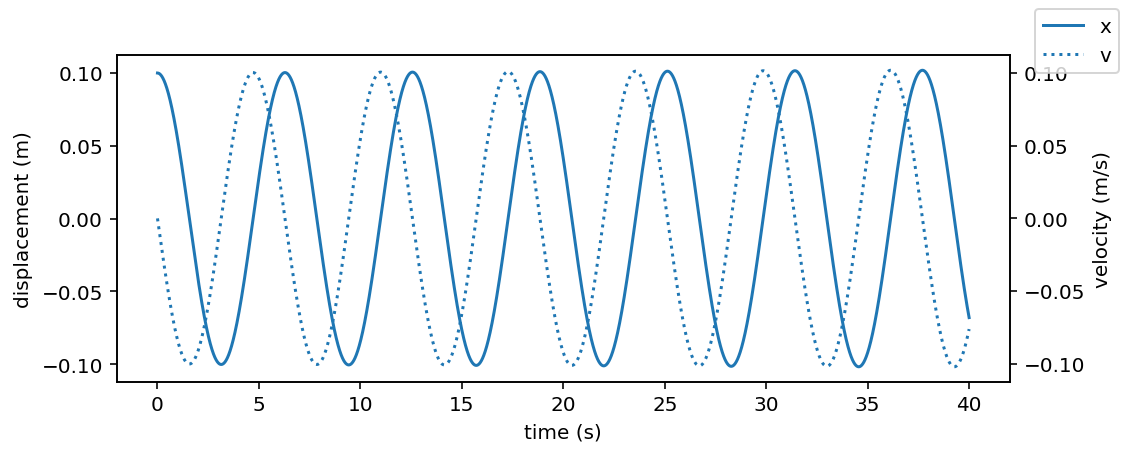

In [20]:
# Note the rather complicated method for setting up the plots
# So that we can have a single legend but separate axes for displacement
# and velocity

fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot()
ax.plot(t, x, ls="-", label="x")
ax.set_ylabel("displacement (m)")
ax.set_xlabel("time (s)")
ax_r = ax.twinx() # allows us to have separate y-axes on left and right
ax_r.plot(t, v, ls=":", label="v")
ax_r.set_ylabel("velocity (m/s)")
fig.legend()

---
**Forward Euler Method**

This method of integrating differential equations is called the Forward Euler method. Faster and more accurate methods are also the available, such as the Runga-Kutta method. A variety of methods can be accessed by importing `scipy.integrate.odeint`.

---

